# Packing as many rectangles as possible into a larger rectangle with rotation

This is a classic problem in computational geometry.
Given a list of rectangles and a larger rectangle.
The goal is to pack as many rectangles as possible into the larger rectangle.
The rectangles can be rotated by 90 degrees.

CP-SAT allows to easily model this problem using the `AddNoOverlap2D` constraint with `OptionalIntervalVar`-variables.
The `OptionalIntervalVar`-variables allow to change the width and height of the rectangles based on some variables, which can be used to rotate the rectangles.

In [1]:
from pathlib import Path
from solver import Instance

with open(Path("./instances/instance_random_1.json"), "r") as file:
    instance = Instance.model_validate_json(file.read())
print(instance)

container=Container(width=100, height=50) rectangles=[Rectangle(width=18, height=9, value=1), Rectangle(width=18, height=19, value=1), Rectangle(width=10, height=8, value=1), Rectangle(width=19, height=11, value=1), Rectangle(width=17, height=20, value=1), Rectangle(width=3, height=19, value=1), Rectangle(width=15, height=13, value=1), Rectangle(width=8, height=6, value=1), Rectangle(width=6, height=15, value=1), Rectangle(width=11, height=18, value=1), Rectangle(width=18, height=16, value=1), Rectangle(width=3, height=6, value=1), Rectangle(width=10, height=16, value=1), Rectangle(width=16, height=7, value=1), Rectangle(width=10, height=15, value=1), Rectangle(width=13, height=20, value=1), Rectangle(width=7, height=11, value=1), Rectangle(width=17, height=15, value=1), Rectangle(width=20, height=17, value=1), Rectangle(width=15, height=4, value=1), Rectangle(width=17, height=14, value=1), Rectangle(width=4, height=20, value=1), Rectangle(width=18, height=16, value=1), Rectangle(width

In [2]:

from solver import RectangleKnapsackWithRotationsModel

model = RectangleKnapsackWithRotationsModel(instance)


In [3]:
# Solve!
model.solve(60.0)


Starting CP-SAT solver v9.8.3296
Parameters: max_time_in_seconds: 60 log_search_progress: true relative_gap_limit: 0.01
Setting number of workers to 16

Initial optimization model '': (model_fingerprint: 0x34dd635826971e6)
#Variables: 400 (#bools: 50 in objective)
  - 100 Booleans in [0,1]
  - 2 in [0,4]
  - 2 in [0,6]
  - 2 in [0,8]
  - 6 in [0,9]
  - 6 in [0,10]
  - 2 in [0,11]
  - 4 in [0,12]
  - 8 in [0,14]
  - 10 in [0,15]
  - 10 in [0,16]
  - 8 in [0,17]
  - 12 in [0,18]
  - 16 in [0,19]
  - 12 in [0,20]
  - 100 in [0,50]
  - 100 in [0,100]
#kInterval: 100 (#enforced: 100)
#kLinear1: 8
#kLinear2: 92
#kLinear3: 100 (#enforced: 100)
#kNoOverlap2D: 1 (#rectangles: 50, #optional: 50, #quadratic_areas: 50)

Starting presolve at 0.00s
  1.02e-04s  0.00e+00d  [DetectDominanceRelations] 
  1.04e-03s  0.00e+00d  [PresolveToFixPoint] #num_loops=2 #num_dual_strengthening=1 
  8.63e-06s  0.00e+00d  [ExtractEncodingFromLinear] 
[Symmetry] Graph for symmetry has 999 nodes and 1'370 arcs.
[Sym

#21      0.50s best:26    next:[27,39]    quick_restart (fixed_bools=0/1726)
#22      0.51s best:29    next:[30,39]    probing (fixed_bools=0/450)
#23      0.55s best:30    next:[31,39]    quick_restart_no_lp (fixed_bools=0/2591)
#24      0.62s best:31    next:[32,39]    probing (fixed_bools=0/452)
#25      2.10s best:32    next:[33,39]    violation_ls(batch:2 #solutions_imported:2 #lin_moves:3 #lin_evals:53 #gen_moves:170 #gen_evals:2'462 #comp_moves:5 #backtracks:22 #weight_updates:126)
#26      3.51s best:33    next:[34,39]    rnd_var_lns (d=0.71 s=31 t=0.10 p=1.00 stall=0 h=auto_l0)
#27      6.20s best:34    next:[35,39]    rins_lp_lns (d=0.54 s=42 t=0.10 p=0.50 stall=0 h=auto_l0)
#28      6.50s best:35    next:[36,39]    rnd_var_lns (d=0.54 s=44 t=0.10 p=0.50 stall=0 h=auto_l0)
#29      8.70s best:36    next:[37,39]    packing_rectangles_lns (d=0.19 s=50 t=0.10 p=0.00 stall=0 h=auto_l0)
#30     13.68s best:37    next:[38,39]    packing_precedences_lns (d=0.12 s=64 t=0.10 p=0.00 st

2

In [4]:
print(model.solution)

placements=[Placement(x=63, y=21, rotated=False), None, Placement(x=25, y=42, rotated=False), None, None, Placement(x=41, y=24, rotated=False), Placement(x=48, y=17, rotated=False), Placement(x=35, y=43, rotated=False), Placement(x=44, y=30, rotated=False), None, Placement(x=57, y=34, rotated=False), Placement(x=44, y=24, rotated=False), Placement(x=33, y=0, rotated=False), Placement(x=9, y=43, rotated=False), Placement(x=80, y=0, rotated=False), None, Placement(x=0, y=29, rotated=True), None, None, Placement(x=51, y=30, rotated=False), Placement(x=59, y=0, rotated=False), Placement(x=66, y=30, rotated=True), None, Placement(x=0, y=0, rotated=False), None, Placement(x=88, y=32, rotated=False), Placement(x=0, y=9, rotated=False), Placement(x=33, y=16, rotated=False), None, Placement(x=20, y=0, rotated=False), Placement(x=38, y=28, rotated=True), Placement(x=43, y=0, rotated=False), Placement(x=91, y=16, rotated=False), Placement(x=75, y=34, rotated=False), None, Placement(x=43, y=46, ro

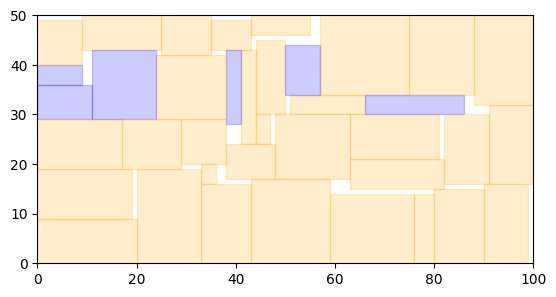

In [5]:
from _plotting import plot_solution
# plot the solution
import matplotlib.pyplot as plt
if model.solution is not None:
    fig, ax = plt.subplots(1)
    plot_solution(ax, instance, model.solution)
    plt.show()
